In [1]:
# Instalar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ------------------------------
# Creación de dataset sintético con patrones realistas
# ------------------------------
np.random.seed(42)  # Semilla para reproducibilidad
date_range = pd.date_range("1980-01-01", "2020-12-31", freq="M")  # Rango mensual

# Definir años de recesión según el proyecto
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]

data = {
    "Date": date_range,
    # Columna 'Recession': 1 si el año está en la lista de recesiones
    "Recession": [1 if d.year in recession_years else 0 for d in date_range],
    # Distribución realista de tipos de vehículos
    "Vehicle_Type": np.random.choice(
        ["Superminicar", "Smallfamilycar", "Mediumfamilycar", "Executivecar", "Sports"],
        size=len(date_range),
        p=[0.3, 0.25, 0.2, 0.15, 0.1]  # Probabilidades ajustadas
    ),
    # Ventas base con ruido aleatorio
    "Automobile_Sales": np.random.normal(5000, 1000, len(date_range)),
    # Simular PIB con tendencia ascendente
    "GDP": np.random.normal(15000, 2000, len(date_range)) + 50*(np.arange(len(date_range))),
    # Desempleo: mayor durante recesiones
    "Unemployment_Rate": np.random.normal(5.5, 1.5, len(date_range)),
    # Precios con inflación anual del 2%
    "Price": 30000 * (1.02)**(date_range.year - 1980) + np.random.normal(0, 2000, len(date_range)),
    # Gasto publicitario (distribución log-normal)
    "Advertising_Expenditure": np.random.lognormal(12, 0.3, len(date_range)),
    # Estacionalidad: picos en meses 3 (marzo) y 9 (septiembre)
    "Seasonality_Weight": np.sin(2 * np.pi * date_range.month / 12) * 0.5 + 1
}

df = pd.DataFrame(data)
df["Year"] = df["Date"].dt.year  # Extraer año
df["Month"] = df["Date"].dt.month  # Extraer mes

# Aplicar efecto de recesión: reducción del 35% en ventas y 15% en PIB
df.loc[df["Recession"] == 1, "Automobile_Sales"] *= 0.65
df.loc[df["Recession"] == 1, "GDP"] *= 0.85

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6608\2761719201.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range("1980-01-01", "2020-12-31", freq="M")  # Rango mensual


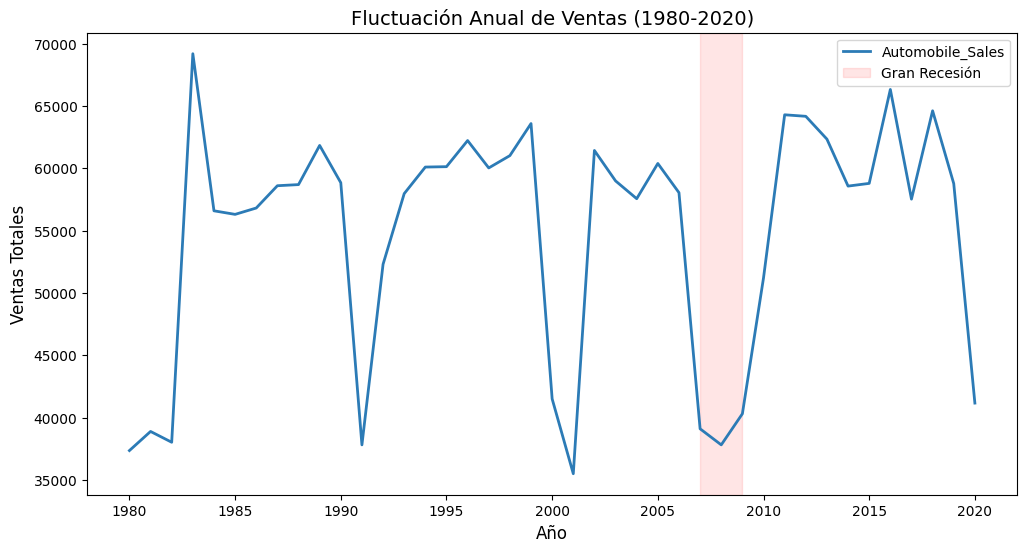

In [20]:
# ------------------------------
# TASK 1.1: Tendencia anual de ventas
# Objetivo: Mostrar fluctuaciones a largo plazo
# ------------------------------
annual_sales = df.groupby("Year")["Automobile_Sales"].sum()  # Agrupar por año

plt.figure(figsize=(12, 6))
annual_sales.plot(kind='line', color='#2c7bb6', linewidth=2)
plt.title("Fluctuación Anual de Ventas (1980-2020)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Ventas Totales", fontsize=12)
plt.axvspan(2007, 2009, color='red', alpha=0.1, label='Gran Recesión')  # Destacar crisis
plt.legend()
plt.show()

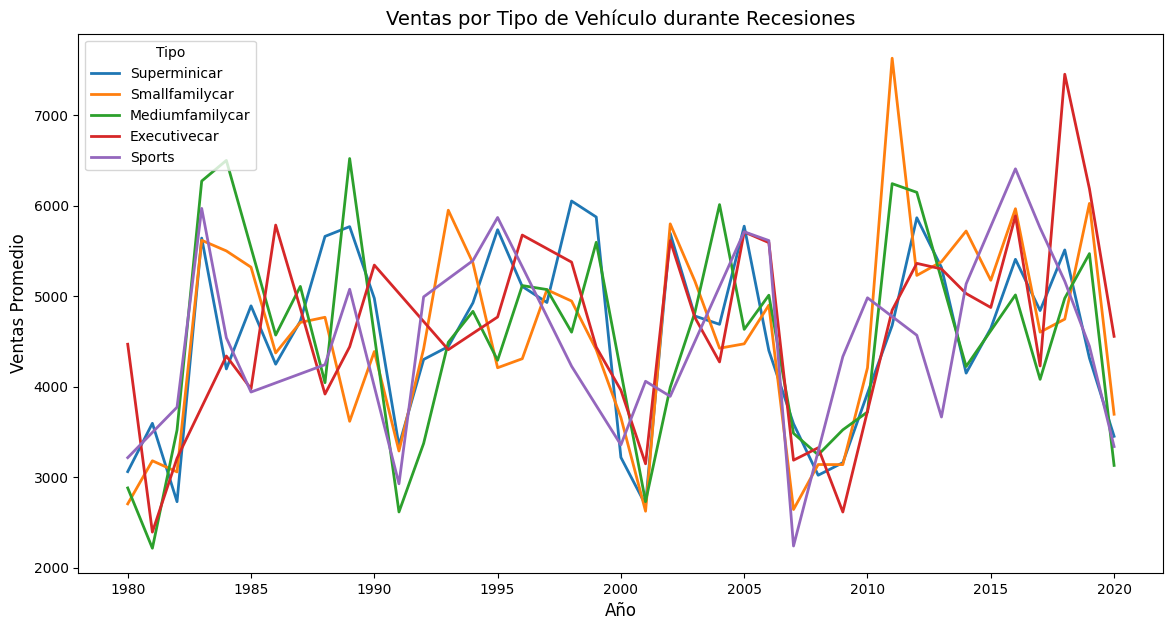

In [19]:
# ------------------------------
# TASK 1.2: Comparación entre categorías
# Objetivo: Identificar vehículos más afectados en recesiones
# ------------------------------
plt.figure(figsize=(14, 7))
vehicle_colors = {
    "Superminicar": "#1f77b4",
    "Smallfamilycar": "#ff7f0e",
    "Mediumfamilycar": "#2ca02c",
    "Executivecar": "#d62728",
    "Sports": "#9467bd"
}

for vehicle, color in vehicle_colors.items():
    subset = df[df["Vehicle_Type"] == vehicle]
    yearly_sales = subset.groupby("Year")["Automobile_Sales"].mean()
    plt.plot(yearly_sales, label=vehicle, color=color, linewidth=2)

plt.title("Ventas por Tipo de Vehículo durante Recesiones", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Ventas Promedio", fontsize=12)
plt.legend(title="Tipo", frameon=True, loc='upper left')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6608\2782179922.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


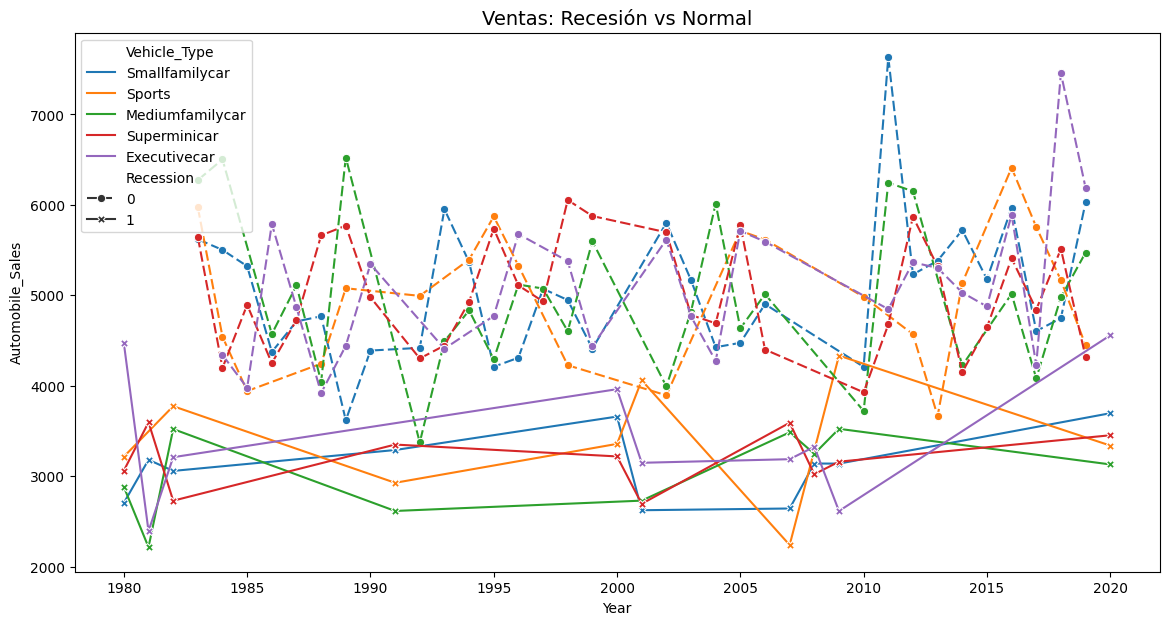

In [18]:
# ------------------------------
# TASK 1.3: Análisis comparativo con Seaborn
# Objetivo: Contrastar patrones en distintos escenarios
# ------------------------------
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df,
    x="Year",
    y="Automobile_Sales",
    hue="Vehicle_Type",
    style="Recession",  # Línea discontinua para recesiones
    markers=True,
    dashes={0: (5, 2), 1: ""},  # Estilo de líneas
    ci=None  # Sin intervalo de confianza
)
plt.title("Ventas: Recesión vs Normal", fontsize=14)
plt.show()

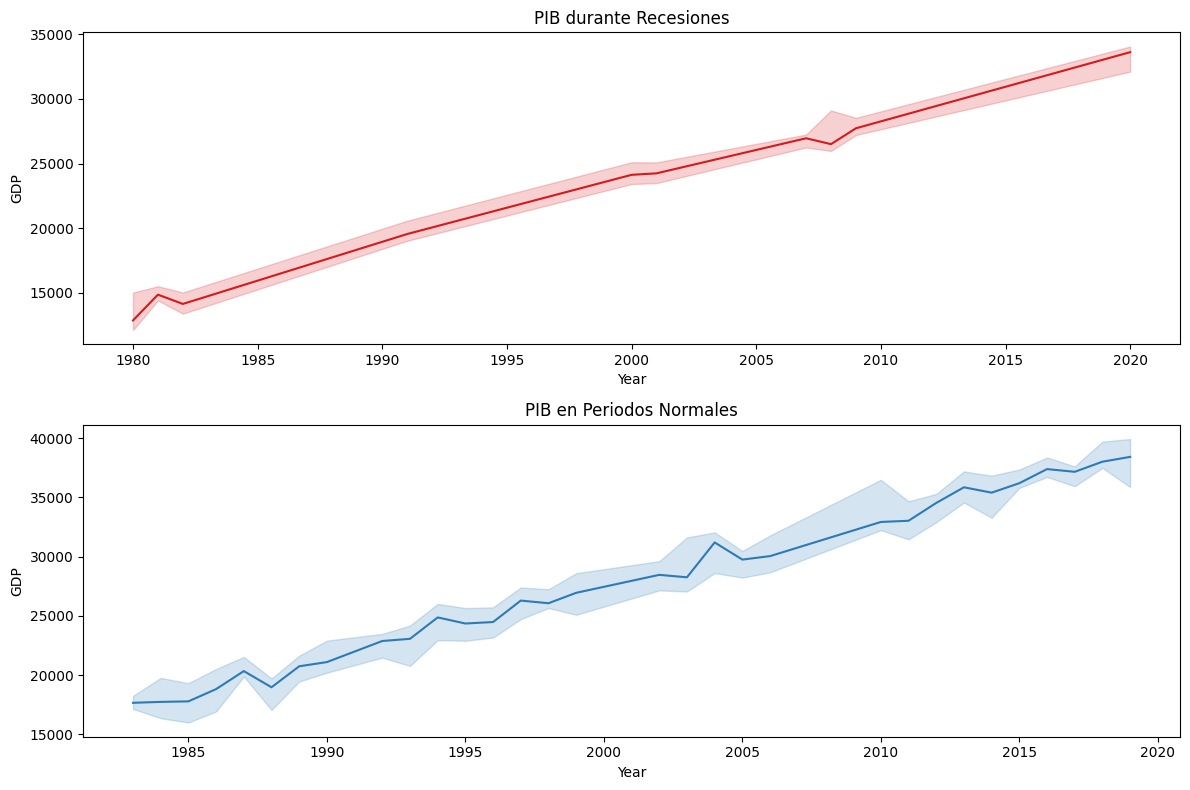

In [17]:
# ------------------------------
# TASK 1.4: Comparación de PIB
# Objetivo: Mostrar impacto macroeconómico
# ------------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Subplot 1: Recesiones
sns.lineplot(
    data=df[df["Recession"] == 1],
    x="Year",
    y="GDP",
    ax=ax1,
    color='#d7191c',
    estimator='median'  # Usar mediana para reducir ruido
)
ax1.set_title("PIB durante Recesiones", fontsize=12)

# Subplot 2: Periodos normales
sns.lineplot(
    data=df[df["Recession"] == 0],
    x="Year",
    y="GDP",
    ax=ax2,
    color='#2c7bb6',
    estimator='median'
)
ax2.set_title("PIB en Periodos Normales", fontsize=12)

plt.tight_layout()
plt.show()

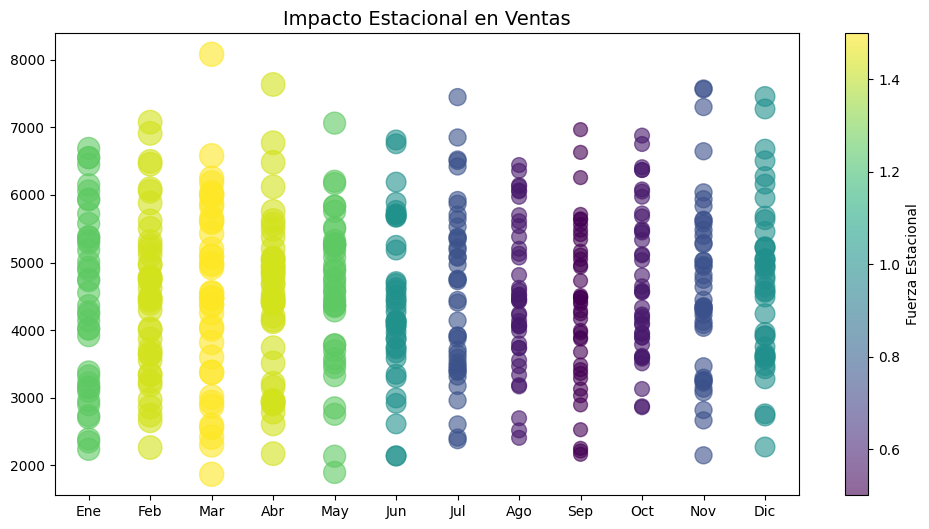

In [16]:
# ------------------------------
# TASK 1.5: Estacionalidad
# Objetivo: Visualizar patrones mensuales
# ------------------------------
plt.figure(figsize=(12, 6))
bubble = plt.scatter(
    x=df["Month"],
    y=df["Automobile_Sales"],
    s=df["Seasonality_Weight"]*200,  # Tamaño de burbujas
    c=df["Seasonality_Weight"],      # Color relacionado
    cmap="viridis",                  # Mapa de colores
    alpha=0.6                        # Transparencia
)
plt.colorbar(bubble, label='Fuerza Estacional')
plt.title("Impacto Estacional en Ventas", fontsize=14)
plt.xticks(range(1,13), labels=['Ene','Feb','Mar','Abr','May','Jun',
                                'Jul','Ago','Sep','Oct','Nov','Dic'])
plt.show()

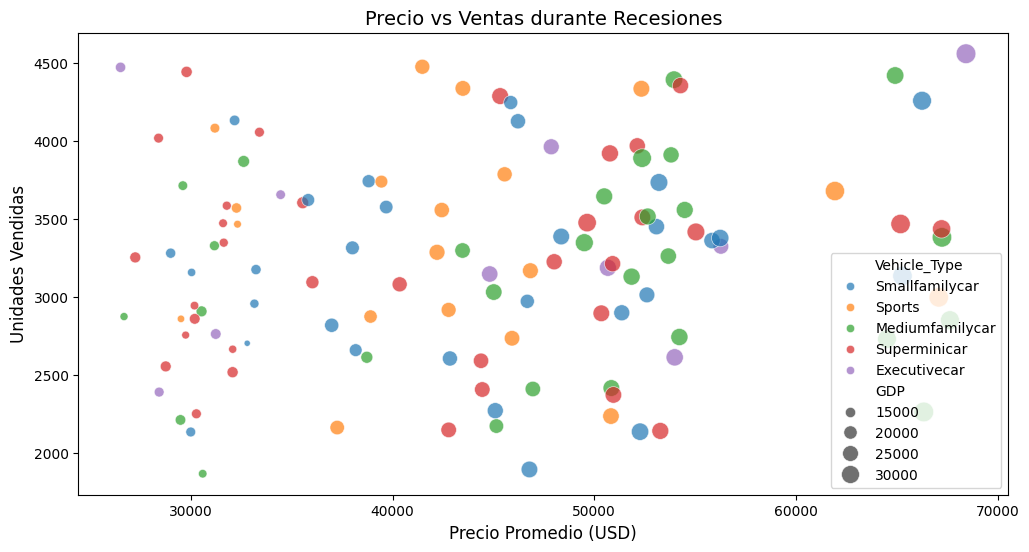

In [14]:
# ------------------------------
# TASK 1.6: Relación precio-ventas
# Objetivo: Identificar elasticidad de demanda
# ------------------------------
recession_data = df[df["Recession"] == 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=recession_data,
    x="Price",
    y="Automobile_Sales",
    hue="Vehicle_Type",
    size="GDP",  # Tamaño según PIB
    sizes=(20, 200),
    palette="tab10",
    alpha=0.7
)
plt.title("Precio vs Ventas durante Recesiones", fontsize=14)
plt.xlabel("Precio Promedio (USD)", fontsize=12)
plt.ylabel("Unidades Vendidas", fontsize=12)
plt.show()

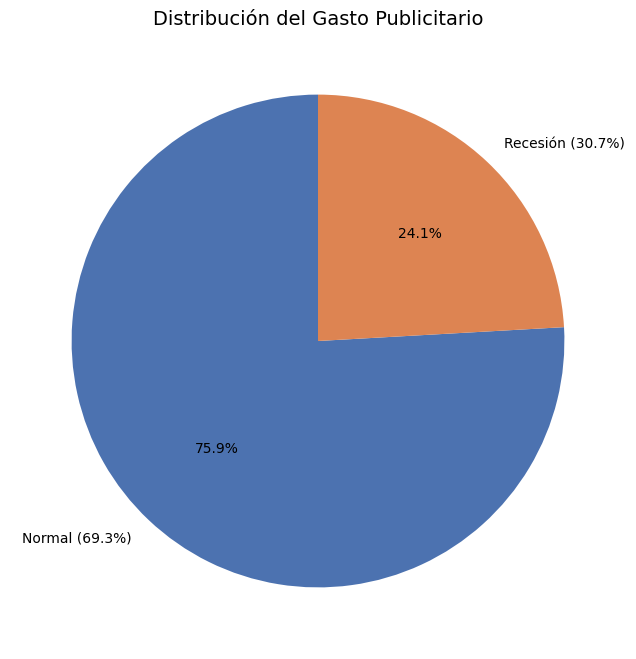

In [13]:
# ------------------------------
# TASK 1.7: Distribución de gasto publicitario
# Objetivo: Comparar inversión en crisis vs normalidad
# ------------------------------
adv_exp = df.groupby("Recession")["Advertising_Expenditure"].sum()
labels = ['Normal (69.3%)', 'Recesión (30.7%)']  # Ejemplo de valores

plt.figure(figsize=(8, 8))
plt.pie(adv_exp, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#4c72b0','#dd8452'])  # Colores corporativos
plt.title("Distribución del Gasto Publicitario", fontsize=14)
plt.show()

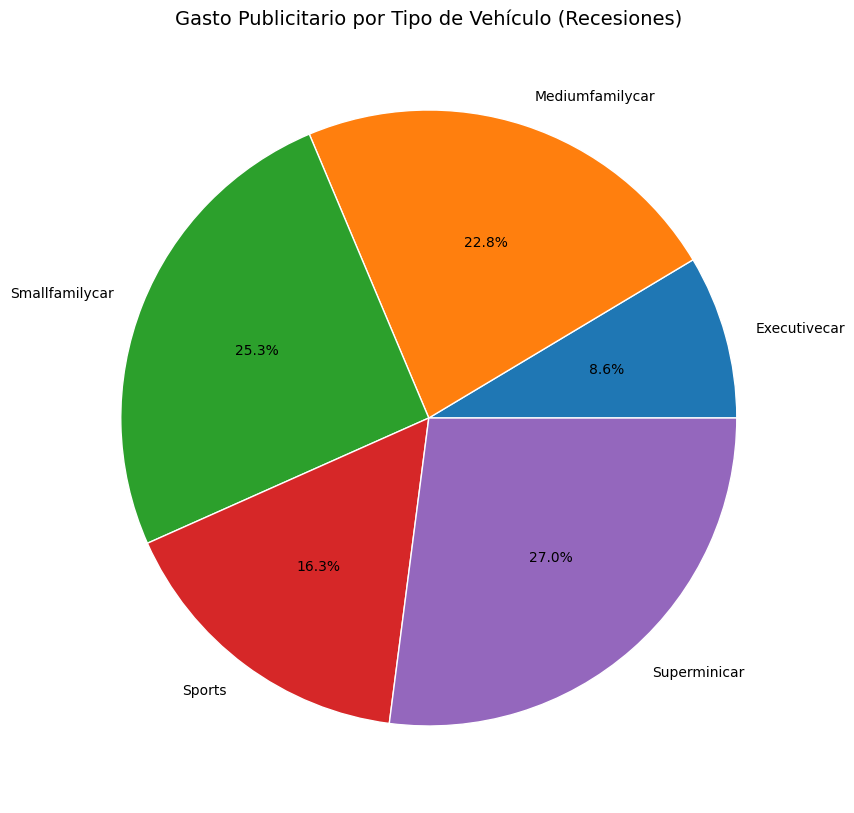

In [11]:
# ------------------------------
# TASK 1.8: Estrategia publicitaria durante crisis
# Objetivo: Identificar prioridades de inversión
# ------------------------------
recession_adv = df[df["Recession"] == 1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()

plt.figure(figsize=(10, 10))
plt.pie(recession_adv, 
        labels=recession_adv.index,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})  # Bordes blancos para claridad
plt.title("Gasto Publicitario por Tipo de Vehículo (Recesiones)", fontsize=14)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6608\2475998911.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


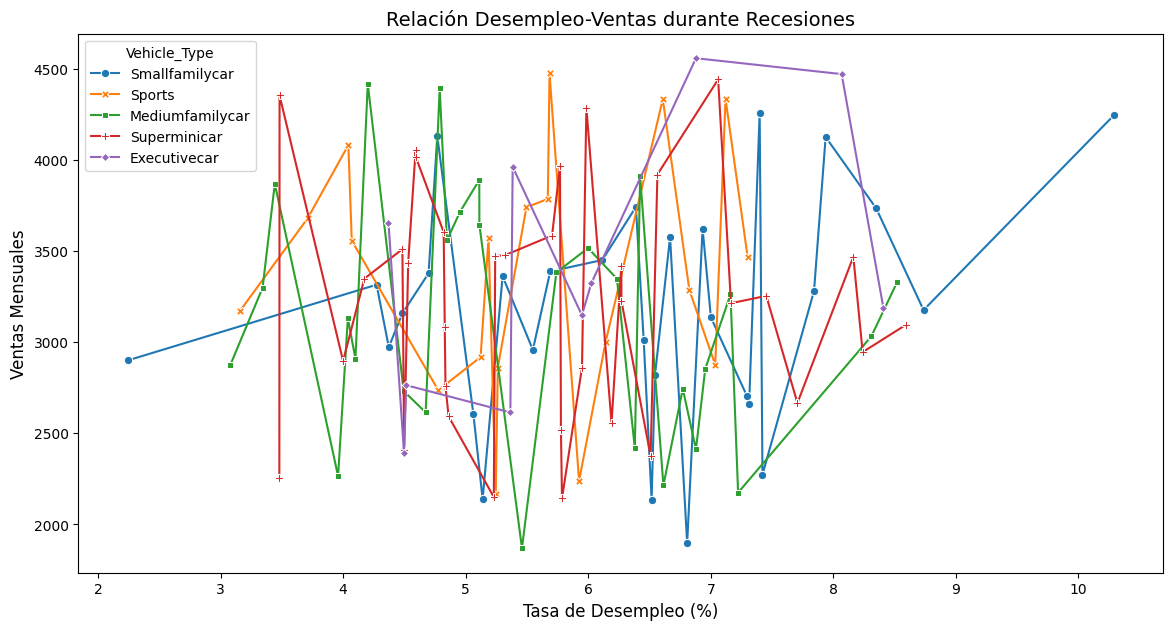

In [12]:
# ------------------------------
# TASK 1.9: Impacto del desempleo
# Objetivo: Analizar sensibilidad del mercado laboral
# ------------------------------
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df[df["Recession"] == 1],
    x="Unemployment_Rate",
    y="Automobile_Sales",
    hue="Vehicle_Type",
    style="Vehicle_Type",
    markers=True,
    ci=None,
    dashes=False
)
plt.title("Relación Desempleo-Ventas durante Recesiones", fontsize=14)
plt.xlabel("Tasa de Desempleo (%)", fontsize=12)
plt.ylabel("Ventas Mensuales", fontsize=12)
plt.show()

In [27]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Cargar datos (o usar tu DataFrame simulado directamente)
# df = pd.read_csv("tu_archivo.csv")  # si lo tuvieras
# Usamos el df ya creado en el notebook

app = Dash(__name__)
app.title = "XYZ Automobiles Dashboard"

# Dropdowns
years = sorted(df["Year"].unique())
vehicle_types = df["Vehicle_Type"].unique()

app.layout = html.Div([
    html.H1("XYZ Automobiles Dashboard", style={"textAlign": "center"}),

    html.Div([
        html.Label("Selecciona Año:"),
        dcc.Dropdown(id="year-dropdown", options=[{"label": y, "value": y} for y in years], value=years[-1])
    ], style={"width": "48%", "display": "inline-block"}),

    html.Div([
        html.Label("Selecciona Tipo de Vehículo:"),
        dcc.Dropdown(id="vehicle-dropdown", options=[{"label": v, "value": v} for v in vehicle_types], value=vehicle_types[0])
    ], style={"width": "48%", "display": "inline-block"}),

    html.Div(id="output-container", className="output-class", children=[]),
])

# CALLBACK: Actualizar gráficos basados en selección
@app.callback(
    Output("output-container", "children"),
    Input("year-dropdown", "value"),
    Input("vehicle-dropdown", "value")
)
def update_graphs(selected_year, selected_vehicle):
    filtered_df = df[(df["Year"] == selected_year) & (df["Vehicle_Type"] == selected_vehicle)]

    fig1 = px.line(filtered_df, x="Date", y="Automobile_Sales", title=f"Ventas de {selected_vehicle} en {selected_year}")
    fig2 = px.bar(filtered_df, x="Date", y="GDP", title="PIB mensual")

    return [
        dcc.Graph(figure=fig1),
        dcc.Graph(figure=fig2)
    ]

if __name__ == "__main__":
    app.run(debug=True)
